In [1]:
!pip install pandas
!pip install numpy
!pip install sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import re, nltk
from collections import Counter
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from html.parser import HTMLParser
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyterlab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 1. Data Cleaning

In [3]:
generic_tweets = open('generic_tweets.txt',"r", encoding = 'utf-8')
generic_tweets = generic_tweets.readlines()
generic_tweets[0:5]

['"class","id","date","query","user","text"\n',
 '"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D"\n',
 '"0","1467810672","Mon Apr 06 22:19:49 PDT 2009","NO_QUERY","scotthamilton","is upset that he can\'t update his Facebook by texting it... and might cry as a result  School today also. Blah!"\n',
 '"0","1467810917","Mon Apr 06 22:19:53 PDT 2009","NO_QUERY","mattycus","@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds"\n',
 '"0","1467811184","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","ElleCTF","my whole body feels itchy and like its on fire "\n']

In [4]:
# delete the first column of the generic tweet list
del generic_tweets[0]

In [5]:
# The function is created to clean the data
def datacleaner(tweet):

    stopWords_file = open("stop_words.txt", "r", encoding = 'utf-8')
    stopWords_list = stopWords_file.readlines()
    
    stop_words = stopwords.words("english") + [stopWords_list]
    tokenizer = RegexpTokenizer(r'\w+')
    for i in range(len(tweet)):
        # removing all html tags
        clean = re.compile('<.*?>')
        tweet[i] = re.sub(clean, '', tweet[i]) 
        
        #replacing Html character codes with ASCII equivalent
        html = HTMLParser()
        tweet[i] = html.unescape(tweet[i])
    
        #removing all URLs
        tweet[i] = re.sub('(\s+\S+.[^\s]+/\S+)','',tweet[i])
        tweet[i] = re.sub('(\s+\S+.ca)','',tweet[i])
        tweet[i] = re.sub('(\s+\S+.uk)','',tweet[i])
        
        #Lowercse all characters in the text
        tweet[i] = tweet[i].lower()
        
        #Removing all the stopwords
        word_list = tokenizer.tokenize(tweet[i])
        filter_words = [word for word in word_list if word not in stop_words]  
        tweet[i] = filter_words
        tweet[i] = " ".join(tweet[i])
        
        #Remove some special characters
        emoji_pattern = re.compile(u"(\ud83d[\ude00-\ude4f])|"  # emoticons
                                u"(\ud83c[\udf00-\uffff])|"  # symbols & pictographs (1 of 2)
                                u"(\ud83d[\u0000-\uddff])|"  # symbols & pictographs (2 of 2)
                                u"(\ud83d[\ude80-\udeff])|"  # transport & map symbols
                                u"(\ud83c[\udde0-\uddff])"  # flags (iOS)
                                "+", flags=re.UNICODE)
        tweet[i] = emoji_pattern.sub(r'', tweet[i])
        tweet[i] = re.sub('[âœðÿˆïº]','',tweet[i])

    return tweet

In [6]:
# generate each generic tweets column for the datafram
generic_tweets_class = [tw.split(',')[:][0].strip('"') for tw in generic_tweets]
generic_tweets_id = [tw.split(',')[:][1].strip('"') for tw in generic_tweets]
generic_tweets_date = [tw.split(',')[:][2].strip('"') for tw in generic_tweets]
generic_tweets_query = [tw.split(',')[:][3].strip('"') for tw in generic_tweets]
generic_tweets_user = [tw.split(',')[:][4].strip('"') for tw in generic_tweets]
generic_tweets_text = [tw.split(',')[:][5].strip('"') for tw in generic_tweets]

In [7]:
# Do dataCleaning for each list
generic_cleaned_tweet_class = datacleaner(generic_tweets_class)
generic_cleaned_tweet_id = datacleaner(generic_tweets_id)
generic_cleaned_tweet_date = datacleaner(generic_tweets_date)
generic_cleaned_tweet_query = datacleaner(generic_tweets_query)
generic_cleaned_tweet_user = datacleaner(generic_tweets_user)
generic_cleaned_tweet_text = datacleaner(generic_tweets_text)

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  app.launch_new_instance()


In [8]:
# Generate dataframe for Generic tweets list

generic_cleaned_tweets_df = pd.DataFrame ({
        'class': generic_cleaned_tweet_class,
        'id': generic_cleaned_tweet_id,
        'date': generic_cleaned_tweet_date,
        'query': generic_cleaned_tweet_query,
        'user': generic_cleaned_tweet_user,
        'text': generic_cleaned_tweet_text
})

generic_cleaned_tweets_df.head(10)

,class,id,date,query,user,text
0,0,1467810369,mon apr 06 22 19 45 pdt 2009,no_query,_thespecialone_,switchfoot awww
1,0,1467810672,mon apr 06 22 19 49 pdt 2009,no_query,scotthamilton,upset thatn update facebook texting might cry ...
2,0,1467810917,mon apr 06 22 19 53 pdt 2009,no_query,mattycus,kenichan dived many times ball managed save 50...
3,0,1467811184,mon apr 06 22 19 57 pdt 2009,no_query,ellectf,whole body feels itchy like fire
4,0,1467811193,mon apr 06 22 19 57 pdt 2009,no_query,karoli,nationwideclass
5,0,1467811372,mon apr 06 22 20 00 pdt 2009,no_query,joy_wolf,kwesidei whole crew
6,0,1467811592,mon apr 06 22 20 03 pdt 2009,no_query,mybirch,need hug
7,0,1467811594,mon apr 06 22 20 03 pdt 2009,no_query,cozz,loltrish hey long time see yes rains bit
8,0,1467811795,mon apr 06 22 20 05 pdt 2009,no_query,2hood4hollywood,tatiana_k nope
9,0,1467812025,mon apr 06 22 20 09 pdt 2009,no_query,mimismo,twittera que muera


In [9]:
# Read 'US_airline_tweets.csv' and generate it as a dataframe
US_airline_tw_df = pd.read_csv('US_airline_tweets.csv', sep=',', encoding='utf-8')
US_airline_tw_df.head(10)

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."
5,5.703000e+17,positive,NaN,dhepburn,0,"@virginamerica Well, I didn'tâ€¦but NOW I DO! :-D"
6,5.702950e+17,positive,NaN,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ..."
7,5.702900e+17,positive,NaN,HyperCamiLax,0,@VirginAmerica I &lt;3 pretty graphics. so muc...
8,5.702900e+17,positive,NaN,HyperCamiLax,0,@VirginAmerica This is such a great deal! Alre...
9,5.702870e+17,positive,NaN,mollanderson,0,@VirginAmerica @virginmedia I'm flying your #f...


In [10]:
# Do data cleaning for US_airline column
US_airline_clean_tw_id = US_airline_tw_df.iloc[:]['id']
US_airline_clean_tw_sentiment = datacleaner(US_airline_tw_df.iloc[:]['sentiment'].tolist())
US_airline_clean_tw_negative_reason = US_airline_tw_df.iloc[:]['negative_reason']
US_airline_clean_tw_user = datacleaner(US_airline_tw_df.iloc[:]['user'].tolist())
US_airline_clean_tw_retweet_count = US_airline_tw_df.iloc[:]['retweet_count']
US_airline_clean_tw_text = datacleaner(US_airline_tw_df.iloc[:]['text'].tolist())

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  app.launch_new_instance()


In [11]:
#Generate a new dataframe for the cleaned us_airline tweets dataset
us_airline_clean_tw_df = pd.DataFrame ({
        'id': US_airline_clean_tw_id,
        'sentiment': US_airline_clean_tw_sentiment,
        'negative_reason': US_airline_clean_tw_negative_reason,
        'user': US_airline_clean_tw_user,
        'retweet_count': US_airline_clean_tw_retweet_count,
        'text': US_airline_clean_tw_text
})

us_airline_clean_tw_df.head(10)

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,virginamerica plus added commercials experienc...
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica really aggressive blast obnoxiou...
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica really big bad thing
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously would pay 30 flight se...
4,5.703010e+17,positive,NaN,cjmcginnis,0,virginamerica yes nearly every time fly vx ea...
5,5.703000e+17,positive,NaN,dhepburn,0,virginamerica well t
6,5.702950e+17,positive,NaN,yupitstate,0,virginamerica amazing arrived hour early good
7,5.702900e+17,positive,NaN,hypercamilax,0,virginamerica 3 pretty graphics much better mi...
8,5.702900e+17,positive,NaN,hypercamilax,0,virginamerica great deal already thinking 2nd ...
9,5.702870e+17,positive,NaN,mollanderson,0,virginamerica virginmedia flying fabulous sedu...


# 2. Exploratory analysis

In [12]:
USairlinescompany = ['virginamerica','united', 'jetblue', 'southwestair', 'usairways', 'americanair', 'delta', 'unknown']

# The function is created to find the number of tweets for each airlines.
def numberoftweetedairlines(US_airline_tw_df, USairlinescompany):
    # create a list of counter for different airlines
    list_counted_airlines = {}
    # initalize the dictionary
    for airline in USairlinescompany:
        list_counted_airlines[airline] = 0
        
    for tw in US_airline_tw_df['text']:
        tw = tw.split(' ')
        if USairlinescompany[0] in tw:
            list_counted_airlines[USairlinescompany[0]] = list_counted_airlines[USairlinescompany[0]] + 1
            continue
        elif USairlinescompany[1] in tw:
            list_counted_airlines[USairlinescompany[1]] = list_counted_airlines[USairlinescompany[1]] + 1
            continue
        elif USairlinescompany[2] in tw:
            list_counted_airlines[USairlinescompany[2]] = list_counted_airlines[USairlinescompany[2]] + 1
            continue
        elif USairlinescompany[3] in tw:
            list_counted_airlines[USairlinescompany[3]] = list_counted_airlines[USairlinescompany[3]] + 1
            continue
        elif USairlinescompany[4] in tw:
            list_counted_airlines[USairlinescompany[4]] = list_counted_airlines[USairlinescompany[4]] + 1
            continue
        elif USairlinescompany[5] in tw:
            list_counted_airlines[USairlinescompany[5]] = list_counted_airlines[USairlinescompany[5]] + 1
            continue
        elif USairlinescompany[6] in tw:
            list_counted_airlines[USairlinescompany[6]] = list_counted_airlines[USairlinescompany[6]] + 1
            continue
        else:
            list_counted_airlines[USairlinescompany[7]] = list_counted_airlines[USairlinescompany[7]] + 1
            continue
            
    return list_counted_airlines

In [13]:
# count how many times each airlines were mentioned
result = numberoftweetedairlines(us_airline_clean_tw_df, USairlinescompany)

result

{'virginamerica': 321,
 'united': 3135,
 'jetblue': 1488,
 'southwestair': 1736,
 'usairways': 2429,
 'americanair': 2125,
 'delta': 3,
 'unknown': 304}

Text(0.5, 1.0, 'The distribution of the US airlines of the tweets')

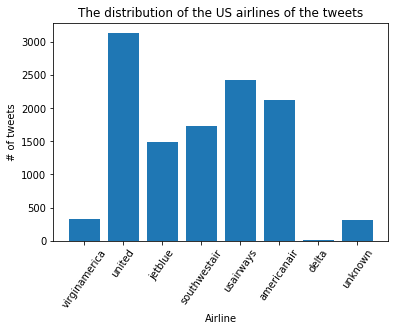

In [14]:
# plot a histogram
l = range(len(result.keys()))
plt.bar(l, result.values())
plt.xticks(l, result.keys(),rotation=55)
plt.xlabel('Airline')
plt.ylabel('# of tweets')
plt.title('The distribution of the US airlines of the tweets')

Above graph shows that majority of the tweet are about united airlines. On the other hand, numbers of tweets about virgin america and delta are relatively small. The reason why there are 'unknown' airlines showing in the graph is because some tweets doesn't state the name of the airline directly. 

For the next part, the histogram will be generated to view how many generic tweets showed public opinion about certain airlines.

In [15]:
generic_result = numberoftweetedairlines(generic_cleaned_tweets_df, USairlinescompany)

In [16]:
generic_result

{'virginamerica': 0,
 'united': 69,
 'jetblue': 3,
 'southwestair': 3,
 'usairways': 1,
 'americanair': 0,
 'delta': 9,
 'unknown': 199915}

Text(0.5, 1.0, 'The distribution of the US airlines of the generic tweets')

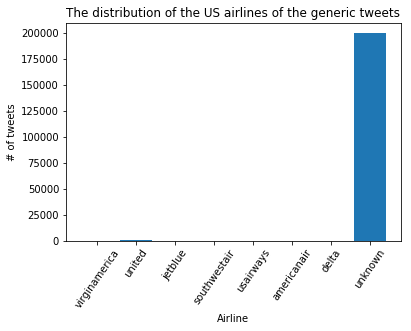

In [17]:
# plot a histogram
l = range(len(generic_result.keys()))
plt.bar(l, generic_result.values())
plt.xticks(l, generic_result.keys(),rotation=55)
plt.xlabel('Airline')
plt.ylabel('# of tweets')
plt.title('The distribution of the US airlines of the generic tweets')

As the histogram, most of the tweets doesn't talk about airlines; which means, the airline companies are totally unrelative to the generic tweets.

# 3. Model Preparation

In [18]:
# This function is created to count the number of every word in the file
# Before using the counter to count the words, the string needs to be tokenized.
def count_words_corpus(file):    
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for content in file:
        words = tokenizer.tokenize(content)
        word_counter.update(words)
    return word_counter

In [19]:
# This function is created to count the word frequency up to 500 words of the input file.
def feature(file, numberwords = 500):
    # Calculate word count in corpus
    words_counted = count_words_corpus(file)
    
    # Select the most common 500 words
    common_words = [word for (word, freq) in words_counted.most_common(numberwords)]
    
    # Generate the list of dataset based on the selected features (X)
    df = []
    for content in file:
        words = content.split(' ')
        df.append([1 if word in words else 0 for word in common_words]) 
    X = pd.DataFrame(df, columns = common_words)
    
    # Create a dataframe of features y
    y = [0, 4]   #the polarity of each tweet (0 = negative emotion, 4 = positive emotion)
    
    return X, y

In [20]:
# data clean the generic tweets
generic_tweet_list_cleaned = datacleaner(generic_tweets)

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  app.launch_new_instance()


In [21]:
# get the features, targets dataframe
feature_df, target_df = feature(generic_tweets_text)

In [22]:
feature_df.head(5)

,good,day,get,like,today,go,work,going,back,love,...,spring,meeting,yep,movies,college,update,problem,agree,open,interesting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
features = feature_df.as_matrix()
features

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
target_df = generic_cleaned_tweets_df['class']
target = target_df.as_matrix()
target

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array(['0', '0', '0', ..., '4', '4', '4'], dtype=object)

In [25]:
#split data ramdomly into training data(70%) and test data(30%)
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

# 4. Model Implementation

In [26]:
# The function is created to do logistic regresssion on training and test set.
def lrmodel(feature_train, feature_test, target_train, target_test):

    # train a logistic regression classifier
    lrclassifier = LogisticRegression(C=1.0).fit(feature_train, target_train)

    # predict on train and test set
    y_train_predict = lrclassifier.predict(feature_train)
    y_test_predict = lrclassifier.predict(feature_test)

    from sklearn.metrics import accuracy_score, confusion_matrix
    
    # calculate train and test accuracy
    train_accuracy = accuracy_score(target_train, y_train_predict)
    test_accuracy = accuracy_score(target_test, y_test_predict)

    # report results
    print("Train accuracy: {}".format(train_accuracy))
    print("Test accuracy: {}".format(test_accuracy))
    return train_accuracy, test_accuracy

In [27]:
#apply logistic regression model on generic tweets 
train_accuracy, test_accuracy = lrmodel(feature_train, feature_test, target_train, target_test)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.6996428571428571
Test accuracy: 0.6980333333333333


As we apply logistic regression model on generic tweets, the train and test accuaracy are calculated as 0.6984214,0.6973666667, respectively.

In [29]:
#  get the features, targets dataframe
feature_df_us_air, target_df_us_air = feature(US_airline_clean_tw_text)

In [30]:
features_usair = feature_df_us_air.as_matrix()
features_usair

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [31]:
target_df_us_air = us_airline_clean_tw_df['sentiment']
target_usair = target_df_us_air.as_matrix()
target_usair

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array(['positive', 'negative', 'negative', ..., 'positive', 'negative',
       'negative'], dtype=object)

In [32]:
#split data ramdomly into training data(70%) and test data(30%)
feature_train_us, feature_test_us, target_train_us, target_test_us = train_test_split(features_usair, target_usair, test_size=0.3, random_state=42)

In [33]:
#apply logistic regression model on us airline tweets 
train_acccuary_usairline, test_accuracy_usairline = lrmodel(feature_train_us, feature_test_us, target_train_us, target_test_us)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.9150779896013865
Test accuracy: 0.8963326595437482


The above result shows that logistic regression model works better on US airline tweets data set. The reason could be that US airline tweets contains more keywords about certain airlines compared to generic tweets.

Split the negative US airline tweets into training data (70%) and test data (30%).

In [34]:
# count how many negative tweets are in in US_airline tweets set
def negativeustweets(us_airline_clean_tw_df, thred = 'negative'):
    List = []
    for i in range(len(us_airline_clean_tw_df['sentiment'])):
        if us_airline_clean_tw_df['sentiment'][i] == thred:
            List.append(i)
    return List

In [35]:
list_index_negUsAirTweets = negativeustweets(us_airline_clean_tw_df)

In [36]:
#The function is created to remove positive sentiments and show only negative ones.
def onlynegative(df):

    rows_list = []
    new_df = pd.DataFrame(columns=['id', 'sentiment', 'negative_reason', 'user', 'retweet_count','text'])
    n = 0
    for i in range(len(df['sentiment'])):
        if df.loc[i,'sentiment'] == 'negative':
            rows_list.append(df.loc[i,:])
    new_df = pd.DataFrame(rows_list) 
    return new_df

In [37]:
# return data frame only contains negative feedback
Negative_USAir_df = onlynegative(us_airline_clean_tw_df)

In [38]:
Negative_USAir_df.head(10)

,id,sentiment,negative_reason,user,retweet_count,text
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica really aggressive blast obnoxiou...
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica really big bad thing
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously would pay 30 flight se...
11,5.702820e+17,negative,Late Flight,smartwatermelon,0,virginamerica sfo pdx schedule still mia
13,5.702770e+17,negative,Bad Flight,heatherovieda,0,virginamerica flew nyc sfo last week fully sit...
16,5.702660e+17,negative,Can't Tell,missgj,0,virginamerica first fares may three times than...
19,5.702570e+17,negative,Customer Service Issue,ayeevickiee,0,virginamerica guys messed seating reserved sea...
20,5.702490e+17,negative,Customer Service Issue,leora13,0,virginamerica status match program applied thr...
21,5.702400e+17,negative,Can't Tell,meredithjlynn,0,virginamerica happened 2 ur vegan food options...
22,5.702080e+17,negative,Bad Flight,blackjackpro911,0,virginamerica amazing thatn get cold air vents...


In [39]:
# data clean the negative reasons
negative_reasons= Negative_USAir_df['negative_reason'].tolist()
negative_reasons = [word.lower() for word in negative_reasons]
negative_reasons[0:9]

['bad flight',
 "can't tell",
 "can't tell",
 'late flight',
 'bad flight',
 "can't tell",
 'customer service issue',
 'customer service issue',
 "can't tell"]

In [40]:
# The function is created to remove overlapped negative reasons in nagative_reasons list above.

def negativereasons(negative_reasons):
    """
        The function is used to get all the negative reasons in neg_reason_clean_list,
        each reason will appear one time in new list.
    """
    list = []
    for reason in negative_reasons:
        if reason not in list:
            list.append(reason)
            
    return list

In [41]:
# return the list of negative reasons
negative_reasons_list = negativereasons(negative_reasons)
negative_reasons_list

['bad flight',
 "can't tell",
 'late flight',
 'customer service issue',
 'flight booking problems',
 'lost luggage',
 'flight attendant complaints',
 'cancelled flight',
 'damaged luggage',
 'longlines']

In [43]:
#  get the features, targets dataframe
feature_df_usAir_negative, target_df_usAir_negative = feature(Negative_USAir_df['text'])

In [44]:
feature_df_usAir_negative.shape

(9178, 500)

In [45]:
features_usAir_negative = feature_df_usAir_negative.as_matrix()
features_usAir_negative

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [46]:
target_df_us_air_negative = Negative_USAir_df['negative_reason']
target_usAir_negative = target_df_us_air_negative.as_matrix()
target_usAir_negative

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array(['Bad Flight', "Can't Tell", "Can't Tell", ..., 'Late Flight',
       'Customer Service Issue', 'Customer Service Issue'], dtype=object)

In [47]:
#split the negative tweets ramdomly into training data(70%) and test data(30%)
feature_train_us_negative, feature_test_us_negative, target_train_us_negative, target_test_us_negative = train_test_split(features_usAir_negative, target_usAir_negative, test_size=0.3, random_state=42)

In [48]:
#apply logistic regression model on negative tweets 
train_ac_usAir_negative, test_ac_usAir_negative = lrmodel(feature_train_us_negative, feature_test_us_negative, target_train_us_negative, target_test_us_negative)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train accuracy: 0.6938044831880449
Test accuracy: 0.5962236746550472


After applying logistic regression model on negative tweets on US airline, setting negative reasons as target and top 500 common words as features, the train and test accuracy is shown as 0.693804 and 0.5962237, respectively.

# 5. Result

Research Question:What can public opinion on Twitter tell us about the US airlines in 2015?

In [49]:
USairlinescompany = ['virginamerica','united', 'jetblue', 'southwestair', 'usairways', 'americanair', 'delta', 'unknown']

# The function is created to find the number of positive and negative tweets of the airline and count them
def Countpositivenegative(US_airline_tw_df, USairlinescompany):
    
    # Create and initialize dictinaries for all the airline companys
    virginamerica_df = {'positive': 0,'negative': 0}
    united_df = {'positive': 0,'negative': 0}
    jetblue_df = {'positive':0 ,'negative': 0}
    southwestair_df = {'positive': 0,'negative':0}
    usairways_df = {'positive': 0,'negative': 0}
    americanair_df = {'positive': 0,'negative': 0}
    delta_df = {'positive': 0,'negative': 0}

    for i in range(len(US_airline_tw_df['text'])):
        tw = US_airline_tw_df['text'][i].split(' ')
        if USairlinescompany[0] in tw:
            if US_airline_tw_df['sentiment'][i] == 'positive':
                virginamerica_df['positive'] = virginamerica_df['positive'] +1
            else:
                virginamerica_df['negative'] = virginamerica_df['negative'] +1
            continue
        elif USairlinescompany[1] in tw:
            if US_airline_tw_df['sentiment'][i] == 'positive':
                united_df['positive'] = united_df['positive'] +1
            else:
                united_df['negative'] = united_df['negative'] +1
            continue
        elif USairlinescompany[2] in tw:
            if US_airline_tw_df['sentiment'][i] == 'positive':
                jetblue_df['positive'] = jetblue_df['positive'] +1
            else:
                jetblue_df['negative'] = jetblue_df['negative'] +1
            continue
        elif USairlinescompany[3] in tw:
            if US_airline_tw_df['sentiment'][i] == 'positive':
                southwestair_df['positive'] = southwestair_df['positive'] +1
            else:
                southwestair_df['negative'] = southwestair_df['negative'] +1
            continue
        elif USairlinescompany[4] in tw:
            if US_airline_tw_df['sentiment'][i] == 'positive':
                usairways_df['positive'] = usairways_df['positive'] +1
            else:
                usairways_df['negative'] = usairways_df['negative'] +1
            continue
        elif USairlinescompany[5] in tw:
            if US_airline_tw_df['sentiment'][i] == 'positive':
                americanair_df['positive'] = americanair_df['positive'] +1
            else:
                americanair_df['negative'] = americanair_df['negative'] +1
            continue
        elif USairlinescompany[6] in tw:
            if US_airline_tw_df['sentiment'][i] == 'positive':
                delta_df['positive'] = delta_df['positive'] +1
            else:
                delta_df['negative'] = delta_df['negative'] +1
            continue
            
    return virginamerica_df,united_df, jetblue_df,southwestair_df, usairways_df, americanair_df, delta_df

In [50]:
# calculate and show those dictionary for each airlines
virginamerica_df,united_df, jetblue_df,southwestair_df, usairways_df, americanair_df, delta_df  = Countpositivenegative(us_airline_clean_tw_df, USairlinescompany)

In [51]:
virginamerica_df

{'positive': 147, 'negative': 174}

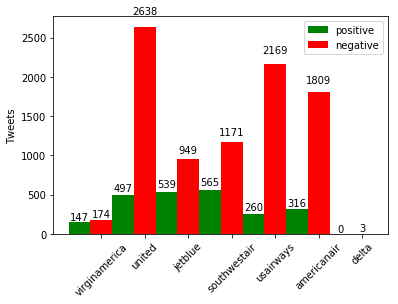

In [52]:
#plot the histogram for the dictionaries
x = np.arange(7)  # the x locations for the groups
width = 0.5

fig = plt.figure()
ax = fig.add_subplot(111)
yvals = [virginamerica_df['positive'],united_df['positive'],jetblue_df['positive'],southwestair_df['positive'],usairways_df['positive'],americanair_df['positive'], delta_df['positive']]
rects1 = ax.bar(x, yvals, width, color='g')
zvals = [virginamerica_df['negative'],united_df['negative'],jetblue_df['negative'],southwestair_df['negative'],usairways_df['negative'],americanair_df['negative'], delta_df['negative']]
rects2 = ax.bar(x+width, zvals, width, color='r')

ax.set_ylabel('Tweets')
ax.set_xticks(x+width)
ax.set_xticklabels( ('virginamerica', 'united', 'jetblue', 'southwestair', 'usairways', 'americanair', 'delta'), rotation=45)
ax.legend( (rects1[0], rects2[0]), ('positive', 'negative') )

def label(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

label(rects1)
label(rects2)


plt.show()

Above histogram shows that united,usairways, and americanair has the most negative reviews compared to other airlines. Even though united, jetblue, and southwest air has more positive public opinions that the others, their number of positive reviews are relatively smaller than their negative ones.

For the second model, confusion matrix diagram will be built to figure why the model failed to predict correct negative reasons.

In [53]:
def confusionmatrix(X, y, numberoftests):

    confusion_matrix_list = []

    for i in range(numberoftests):
    
        # split to train and test set
        import random
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,500))

        # train a logistic regression classifier
        lrclassifier = LogisticRegression(C=1.0).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = lrclassifier.predict(X_train)
        y_test_predict = lrclassifier.predict(X_test)
        
        confusionmatrix = confusion_matrix(y_test, y_test_predict)
        confusion_matrix_list.append(confusionmatrix)
    
    # sum the confusion matrices and return the combined confusion matrix
    combined_confusion_matrix = pd.Panel(confusion_matrix_list).sum(axis=0)
    
    # validate return type
    assert isinstance(combined_confusion_matrix, pd.DataFrame), "return type"
    
    return combined_confusion_matrix

In [54]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    plt.colorbar()
    
    # add labels for all targets
    num_targets = cm.shape[0]
    plt.xticks(list(range(num_targets+1)))
    plt.yticks(list(range(num_targets+1)))

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


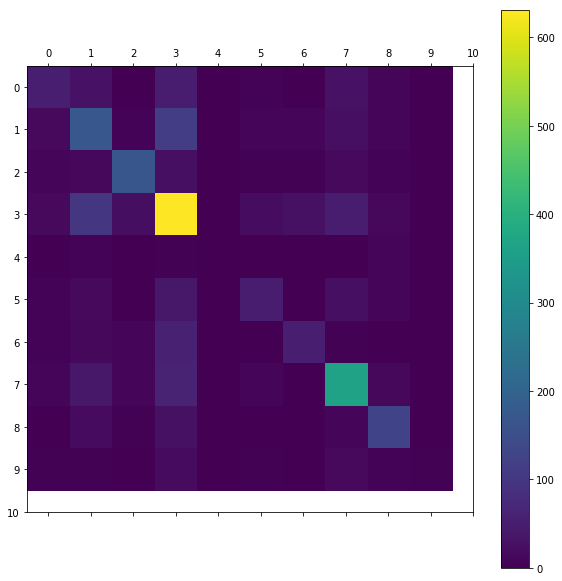

In [55]:
cm9 = confusionmatrix(feature_df_usAir_negative, target_usAir_negative, numberoftests = 1)
plot_confusion_matrix(cm9)

In [56]:
negative_reasons_list

['bad flight',
 "can't tell",
 'late flight',
 'customer service issue',
 'flight booking problems',
 'lost luggage',
 'flight attendant complaints',
 'cancelled flight',
 'damaged luggage',
 'longlines']

The above shows the reason for each number in confusion matrix. the matrix shows dark colors on 4-4 and 9-9 which are 'flight booking problems' and 'longlines'.' This shows that there are small numbers of predicted negative reasons that match the real reason. The reason for this mismatch could be that the three complaint are similar to one another. 

To improve the accuracy of this model, the US_airline_data could be correcting the data by combining the tweets that have similar reasons. The above matrix shows 10 reasons. This could be reduced by combining the similar ones.